In [1]:
import os
import numpy as np
import pandas as pd
df=pd.read_csv("dynamic_pricing")


FileNotFoundError: [Errno 2] No such file or directory: 'dynamic_pricing'

In [2]:
df=pd.read_csv("dynamic_pricing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [4]:
print("Shape:", df.shape)

Shape: (1000, 10)


In [5]:
print(df.describe())

       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000                25.993449  
25%           3.8

In [6]:
print(df.describe(include=['object']))

       Location_Category Customer_Loyalty_Status Time_of_Booking Vehicle_Type
count               1000                    1000            1000         1000
unique                 3                       3               4            2
top                Urban                  Silver           Night      Premium
freq                 346                     367             276          522


In [7]:
print(df.isna().sum())

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64


In [8]:
print(df.duplicated().sum())

0


In [11]:
num_cols=df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols=df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Categorical Columns:",cat_cols)

Categorical Columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']


In [12]:
print("Numeric columns:",num_cols)

Numeric columns: ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']


In [4]:
import pandas as pd  

df = pd.read_csv("dynamic_pricing.csv")  
print(df.head())   # shows first 5 rows

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

In [5]:
cat_cols = df.select_dtypes(include=['object']).columns

# Unique values and counts
cat_uniques = {c: sorted(df[c].astype(str).unique().tolist()) for c in cat_cols}
cat_counts = {c: int(df[c].nunique()) for c in cat_cols}

print("Unique values per categorical column:")
for c in cat_cols:
    print(f"- {c} ({cat_counts[c]}): {cat_uniques[c]}")

Unique values per categorical column:
- Location_Category (3): ['Rural', 'Suburban', 'Urban']
- Customer_Loyalty_Status (3): ['Gold', 'Regular', 'Silver']
- Time_of_Booking (4): ['Afternoon', 'Evening', 'Morning', 'Night']
- Vehicle_Type (2): ['Economy', 'Premium']


In [6]:
inconsistency_flags = {}
for c in cat_cols:
    raw = df[c].astype(str)
    norm = raw.str.strip().str.lower()   # normalize (remove spaces + lowercase)
    inconsistency_flags[c] = int((raw != norm).sum())

print("\nPotential formatting inconsistencies (case/whitespace) per categorical col:")
print(inconsistency_flags)


Potential formatting inconsistencies (case/whitespace) per categorical col:
{'Location_Category': 1000, 'Customer_Loyalty_Status': 1000, 'Time_of_Booking': 1000, 'Vehicle_Type': 1000}


In [8]:
cat_cols = ["Location_Category", "Customer_Loyalty_Status", "Time_of_Booking", "Vehicle_Type"]

for col in cat_cols:
    # Remove extra spaces + lowercase for uniformity
    df[col] = df[col].str.strip().str.lower()
    
    # Replace multiple spaces with one
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)

# ✅ Verify cleaned categories
for col in cat_cols:
    print(f"\n{col} unique values:\n", df[col].unique())



Location_Category unique values:
 ['urban' 'suburban' 'rural']

Customer_Loyalty_Status unique values:
 ['silver' 'regular' 'gold']

Time_of_Booking unique values:
 ['night' 'evening' 'afternoon' 'morning']

Vehicle_Type unique values:
 ['premium' 'economy']


In [9]:
def category_health_summary(df, cat_cols):
    summary = {}
    for col in cat_cols:
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100
        summary[col] = pd.DataFrame({"Count": counts, "Percentage": percentages.round(2)})
    return summary

# Categorical columns
cat_cols = ["Location_Category", "Customer_Loyalty_Status", "Time_of_Booking", "Vehicle_Type"]

# Run the summary
summary = category_health_summary(df, cat_cols)

# Display results
for col, stats in summary.items():
    print(f"\n📊 {col} distribution:\n")
    print(stats)



📊 Location_Category distribution:

                   Count  Percentage
Location_Category                   
urban                346        34.6
rural                332        33.2
suburban             322        32.2

📊 Customer_Loyalty_Status distribution:

                         Count  Percentage
Customer_Loyalty_Status                   
silver                     367        36.7
regular                    320        32.0
gold                       313        31.3

📊 Time_of_Booking distribution:

                 Count  Percentage
Time_of_Booking                   
night              276        27.6
afternoon          247        24.7
morning            246        24.6
evening            231        23.1

📊 Vehicle_Type distribution:

              Count  Percentage
Vehicle_Type                   
premium         522        52.2
economy         478        47.8


In [10]:
import numpy as np

# Select only numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Dictionaries to store results
iqr_bounds = {}
iqr_outlier_counts = {}
z_outlier_counts = {}

# Outlier detection loop
for c in num_cols:
    # --- IQR Method ---
    q1, q3 = df[c].quantile(0.25), df[c].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    
    # Save IQR bounds
    iqr_bounds[c] = (round(lower, 2), round(upper, 2))
    
    # Mask outliers
    mask_iqr = (df[c] < lower) | (df[c] > upper)
    iqr_outlier_counts[c] = int(mask_iqr.sum())
    df[f"is_outlier_IQR_{c}"] = mask_iqr
    
    # --- Z-score Method ---
    mean, std = df[c].mean(), df[c].std(ddof=0)
    if std == 0:
        z_outlier_counts[c] = 0
        df[f"is_outlier_Z_{c}"] = False
    else:
        z = (df[c] - mean) / std
        mask_z = z.abs() > 3
        z_outlier_counts[c] = int(mask_z.sum())
        df[f"is_outlier_Z_{c}"] = mask_z

# Print results
print(" IQR bounds per numeric column:\n", iqr_bounds)
print("\n IQR outlier counts:\n", iqr_outlier_counts)
print("\n Z-score outlier counts:\n", z_outlier_counts)


 IQR bounds per numeric column:
 {'Number_of_Riders': (np.float64(-21.5), np.float64(142.5)), 'Number_of_Drivers': (np.float64(-29.5), np.float64(78.5)), 'Number_of_Past_Rides': (np.float64(-50.0), np.float64(150.0)), 'Average_Ratings': (np.float64(2.73), np.float64(5.78)), 'Expected_Ride_Duration': (np.float64(-65.12), np.float64(267.88)), 'Historical_Cost_of_Ride': (np.float64(-212.33), np.float64(944.2))}

 IQR outlier counts:
 {'Number_of_Riders': 0, 'Number_of_Drivers': 10, 'Number_of_Past_Rides': 0, 'Average_Ratings': 0, 'Expected_Ride_Duration': 0, 'Historical_Cost_of_Ride': 0}

 Z-score outlier counts:
 {'Number_of_Riders': 0, 'Number_of_Drivers': 4, 'Number_of_Past_Rides': 0, 'Average_Ratings': 0, 'Expected_Ride_Duration': 0, 'Historical_Cost_of_Ride': 0}


In [13]:
# Price (Recommended dynamic price) - assume 20% markup on cost if not present
if "Price" not in df.columns:
    df["Price"] = df["Historical_Cost_of_Ride"] * 1.2

# Baseline Price - assume 10% markup on cost
df["Baseline_Price"] = df["Historical_Cost_of_Ride"] * 1.1

# Completed Rides
if "Completed_Rides" not in df.columns:
    df["Completed_Rides"] = df["Number_of_Riders"]

# Synthetic Cancelled Rides (5–15% of completed rides, random)
if "Cancelled_Rides" not in df.columns:
    np.random.seed(42)
    df["Cancelled_Rides"] = (df["Completed_Rides"] *
                             np.random.uniform(0.05, 0.15, len(df))).astype(int)

# Booking Intents = Completed + Cancelled
df["Booking_Intents"] = df["Completed_Rides"] + df["Cancelled_Rides"]

# Cost per ride
df["Cost"] = df["Historical_Cost_of_Ride"]

# ----------------------------
# Step 2: KPI Calculations
# ----------------------------

# Revenue
df["Revenue"] = df["Price"] * df["Completed_Rides"]

# Baseline Revenue
df["Baseline_Revenue"] = df["Baseline_Price"] * df["Completed_Rides"]

# Profit
df["Profit"] = (df["Price"] - df["Cost"]) * df["Completed_Rides"]

# Revenue Lift (%)
df["Revenue_Lift_%"] = ((df["Revenue"] - df["Baseline_Revenue"]) /
                        df["Baseline_Revenue"]) * 100

# Gross Margin (%)
df["Gross_Margin_%"] = (df["Revenue"] - (df["Cost"] * df["Completed_Rides"])) / df["Revenue"] * 100

# Conversion Rate (%)
df["Conversion_Rate_%"] = (df["Completed_Rides"] / df["Booking_Intents"]) * 100

# Cancellation Rate (%)
df["Cancellation_Rate_%"] = (df["Cancelled_Rides"] / df["Booking_Intents"]) * 100

# Price Change Rate (%)
price_changes = (df["Price"].diff() != 0).sum()
Price_Change_Rate = (price_changes / len(df)) * 100

# ----------------------------
# Step 3: Aggregate KPI Summary
# ----------------------------
print("\n📊 KPI Summary (Aggregated)")
print(f"Total Revenue (₹): {df['Revenue'].sum():,.2f}")
print(f"Total Profit (₹): {df['Profit'].sum():,.2f}")
print(f"Revenue Lift (%): {df['Revenue_Lift_%'].mean():.2f}%")
print(f"Average Gross Margin (%): {df['Gross_Margin_%'].mean():.2f}%")
print(f"Average Conversion Rate (%): {df['Conversion_Rate_%'].mean():.2f}%")
print(f"Average Cancellation Rate (%): {df['Cancellation_Rate_%'].mean():.2f}%")
print(f"Price Change Rate (%): {Price_Change_Rate:.2f}%")

# ----------------------------
# Step 4: Ride-level KPI Dashboard
# ----------------------------
kpi_cols = [
    "Revenue", "Profit", "Revenue_Lift_%", "Gross_Margin_%",
    "Conversion_Rate_%", "Cancellation_Rate_%"
]
kpi_dashboard = df[kpi_cols]
kpi_dashboard.head(10)  # preview


📊 KPI Summary (Aggregated)
Total Revenue (₹): 27,017,454.02
Total Profit (₹): 4,502,909.00
Revenue Lift (%): 9.09%
Average Gross Margin (%): 16.67%
Average Conversion Rate (%): 91.86%
Average Cancellation Rate (%): 8.14%
Price Change Rate (%): 100.00%


,Revenue,Profit,Revenue_Lift_%,Gross_Margin_%,Conversion_Rate_%,Cancellation_Rate_%
0,30699.785486,5116.630914,9.090909,16.666667,92.783505,7.216495
1,12101.682791,2016.947132,9.090909,16.666667,87.878788,12.121212
2,16621.691636,2770.281939,9.090909,16.666667,89.361702,10.638298
3,50217.491551,8369.581925,9.090909,16.666667,90.816327,9.183673
4,54258.181133,9043.030189,9.090909,16.666667,93.975904,6.024096
5,24068.839531,4011.473255,9.090909,16.666667,95.161290,4.838710
6,11613.268006,1935.544668,9.090909,16.666667,94.897959,5.102041
7,17544.402649,2924.067108,9.090909,16.666667,88.571429,11.428571
8,47533.906657,7922.317776,9.090909,16.666667,90.804598,9.195402
9,20109.265574,3351.544262,9.090909,16.666667,89.361702,10.638298


In [3]:
!pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 6.5 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 6.5 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 7.3 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 7.0 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 6.7 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.8 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.3 MB 1.9 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.3 MB 3.0 MB/s eta 0:00:01
   -------------------------------- ------- 1.8/2.3 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 2.6 MB/s  0:00:00
   -----------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("dynamic_pricing.csv")


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [4]:
import os
import numpy as np
import pandas as pd
df=pd.read_csv("dynamic_pricing.csv")


In [5]:
df.info

<bound method DataFrame.info of      Number_of_Riders  Number_of_Drivers Location_Category  \
0                  90                 45             Urban   
1                  58                 39          Suburban   
2                  42                 31             Rural   
3                  89                 28             Rural   
4                  78                 22             Rural   
..                ...                ...               ...   
995                33                 23             Urban   
996                84                 29             Urban   
997                44                  6          Suburban   
998                53                 27          Suburban   
999                78                 63             Rural   

    Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                    Silver                    13             4.47   
1                    Silver                    72             4.06   
2            

In [6]:
df.head()


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
print(df.columns.tolist())


['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']


In [10]:
# ----------------------------
# Step 1: Derived Columns
# ----------------------------

# Price (Recommended dynamic price) - assume 20% markup on cost if not present
if "Price" not in df.columns:
    df["Price"] = df["Historical_Cost_of_Ride"] * 1.2

# Baseline Price - assume 10% markup on cost
df["Baseline_Price"] = df["Historical_Cost_of_Ride"] * 1.1

# Completed Rides
df["Completed_Rides"] = df["Number_of_Riders"]

# Synthetic Cancelled Rides
np.random.seed(42)
df["Cancelled_Rides"] = (df["Completed_Rides"] *
                         np.random.uniform(0.05, 0.15, len(df))).astype(int)

# Booking Intents
df["Booking_Intents"] = df["Completed_Rides"] + df["Cancelled_Rides"]

# Cost
df["Cost"] = df["Historical_Cost_of_Ride"]

# ----------------------------
# Step 2: KPI Calculations
# ----------------------------
df["Revenue"] = df["Price"] * df["Completed_Rides"]
df["Baseline_Revenue"] = df["Baseline_Price"] * df["Completed_Rides"]
df["Profit"] = (df["Price"] - df["Cost"]) * df["Completed_Rides"]


In [11]:
print(df.columns.tolist())

['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride', 'Price', 'Baseline_Price', 'Completed_Rides', 'Cancelled_Rides', 'Booking_Intents', 'Cost', 'Revenue', 'Baseline_Revenue', 'Profit']


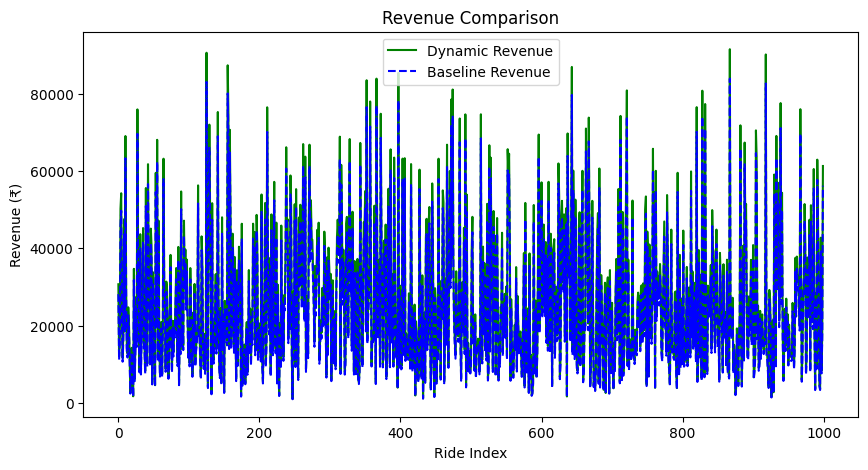

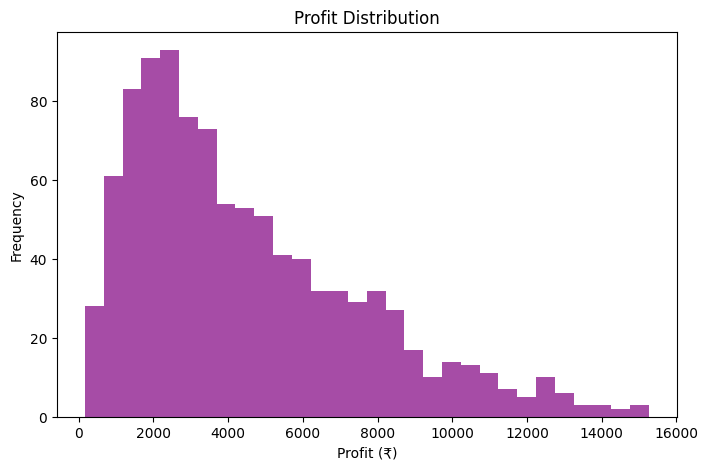

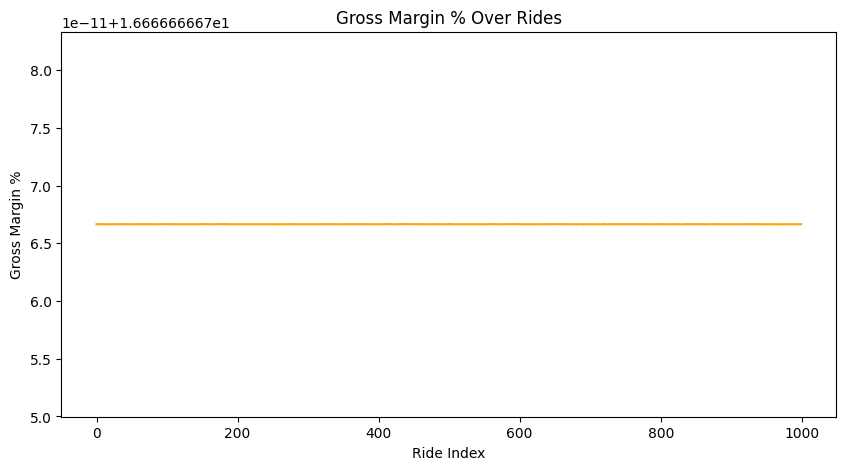

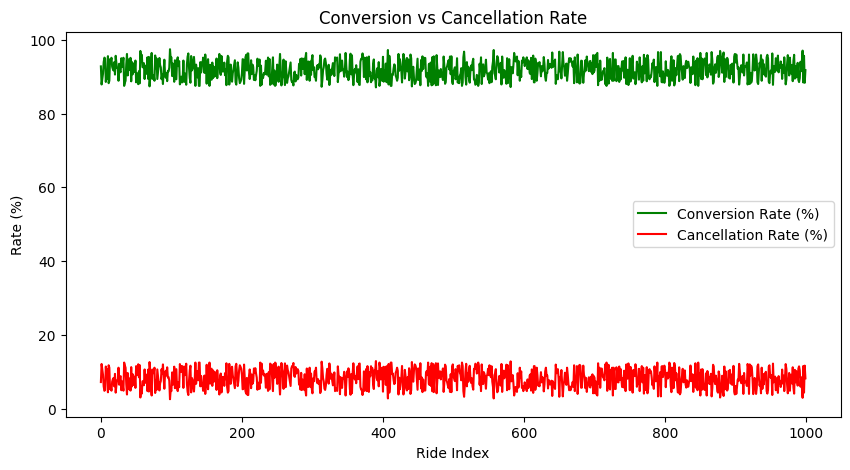

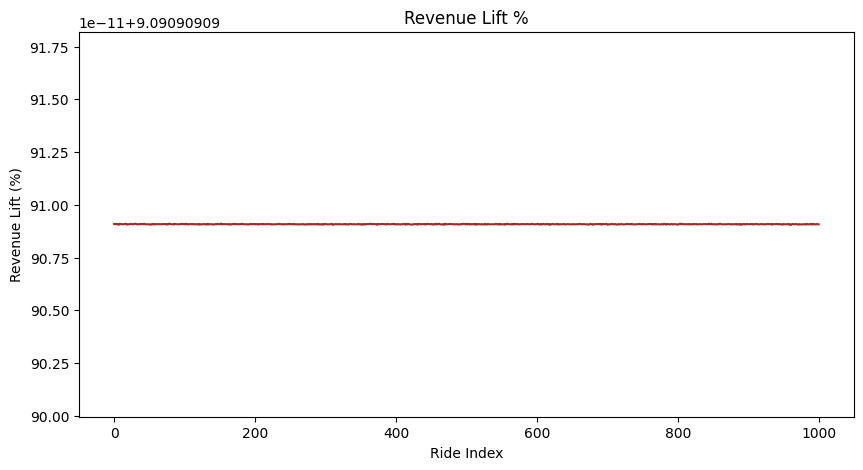

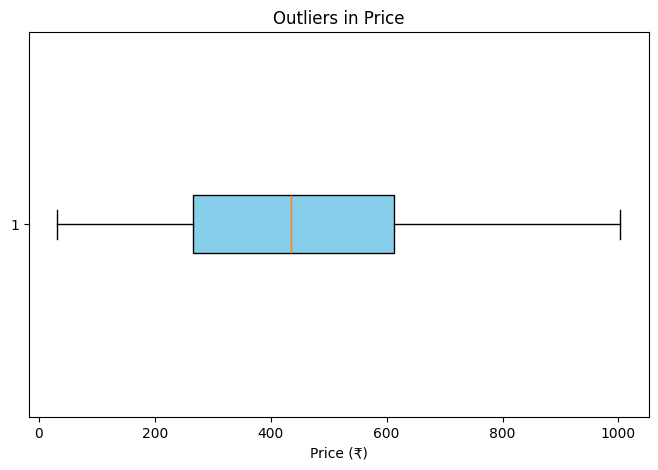

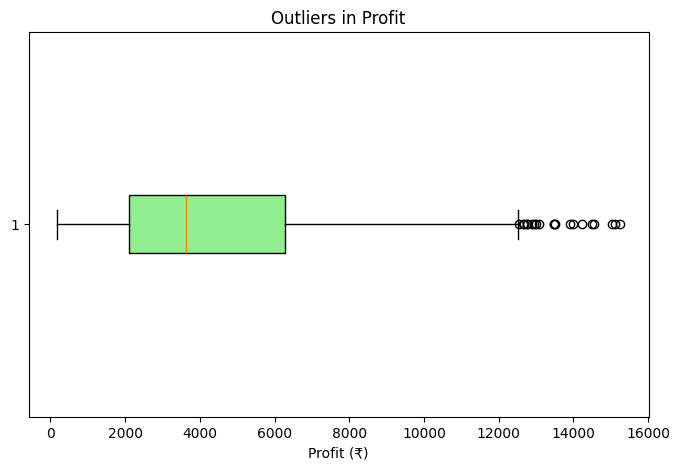

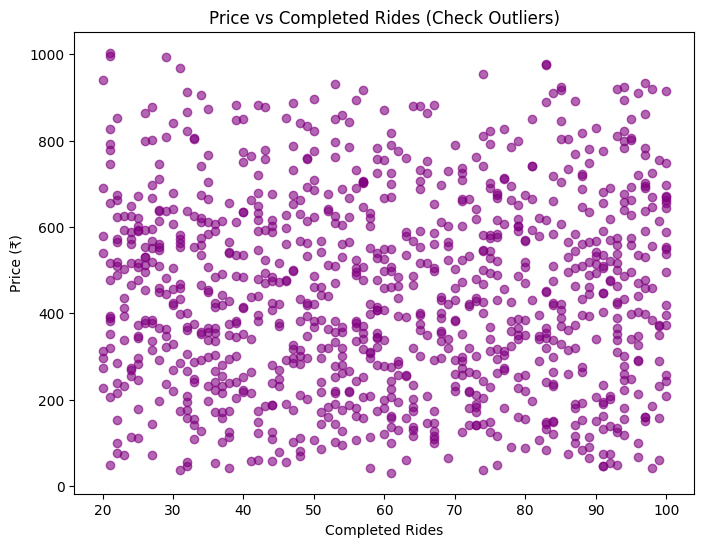

In [12]:
import matplotlib.pyplot as plt

# 1. Revenue vs Baseline Revenue
plt.figure(figsize=(10,5))
plt.plot(df.index, df["Revenue"], label="Dynamic Revenue", color="green")
plt.plot(df.index, df["Baseline_Revenue"], label="Baseline Revenue", color="blue", linestyle="--")
plt.title("Revenue Comparison")
plt.xlabel("Ride Index")
plt.ylabel("Revenue (₹)")
plt.legend()
plt.show()

# 2. Profit Distribution
plt.figure(figsize=(8,5))
plt.hist(df["Profit"], bins=30, color="purple", alpha=0.7)
plt.title("Profit Distribution")
plt.xlabel("Profit (₹)")
plt.ylabel("Frequency")
plt.show()

# 3. Gross Margin % (calculate before plotting)
df["Gross_Margin_%"] = (df["Revenue"] - (df["Cost"] * df["Completed_Rides"])) / df["Revenue"] * 100
plt.figure(figsize=(10,5))
plt.plot(df.index, df["Gross_Margin_%"], color="orange")
plt.title("Gross Margin % Over Rides")
plt.xlabel("Ride Index")
plt.ylabel("Gross Margin %")
plt.show()

# 4. Conversion vs Cancellation Rate
df["Conversion_Rate_%"] = (df["Completed_Rides"] / df["Booking_Intents"]) * 100
df["Cancellation_Rate_%"] = (df["Cancelled_Rides"] / df["Booking_Intents"]) * 100

plt.figure(figsize=(10,5))
plt.plot(df.index, df["Conversion_Rate_%"], label="Conversion Rate (%)", color="green")
plt.plot(df.index, df["Cancellation_Rate_%"], label="Cancellation Rate (%)", color="red")
plt.title("Conversion vs Cancellation Rate")
plt.xlabel("Ride Index")
plt.ylabel("Rate (%)")
plt.legend()
plt.show()

# 5. Revenue Lift %
df["Revenue_Lift_%"] = ((df["Revenue"] - df["Baseline_Revenue"]) /
                        df["Baseline_Revenue"]) * 100
plt.figure(figsize=(10,5))
plt.plot(df.index, df["Revenue_Lift_%"], color="brown")
plt.title("Revenue Lift %")
plt.xlabel("Ride Index")
plt.ylabel("Revenue Lift (%)")
plt.show()

# 6. Outlier Boxplots
plt.figure(figsize=(8,5))
plt.boxplot(df["Price"], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title("Outliers in Price")
plt.xlabel("Price (₹)")
plt.show()

plt.figure(figsize=(8,5))
plt.boxplot(df["Profit"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Outliers in Profit")
plt.xlabel("Profit (₹)")
plt.show()

# 7. Outlier Scatter: Price vs Completed Rides
plt.figure(figsize=(8,6))
plt.scatter(df["Completed_Rides"], df["Price"], alpha=0.6, color="purple")
plt.title("Price vs Completed Rides (Check Outliers)")
plt.xlabel("Completed Rides")
plt.ylabel("Price (₹)")
plt.show()


In [14]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 1.7 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/8.9 MB 1.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/8.9 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/8.9 MB 1.6 MB/s eta 0:00:05
   -------- ------------------------------- 1.8/8.9 MB 1.8 MB/s eta 0:00:04
   --------- ------------------------------ 2.1/8.9 MB 1.7 MB/s eta 0:00:04
   ----------- ---------------------------- 2.6/8.9 MB 1.7 MB/s eta 0:00:04
   ------------ --------------------------- 2.9/8.9 MB 1.6 MB/s eta 0:00:04
   -------------- ------------------------- 3.1/8.9 MB 1.6 MB/s eta 0:00:04
   --------------- ------------------------ 3.4/8.9 MB 1.6 MB/s eta 0:00:04
   ---------------- ----------------------- 3.7/8.9 MB 1.5 MB/s eta 0:00:04
   ----------------- -----

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sns.set(style="whitegrid", rc={"figure.figsize": (10, 5)})

# helper to find a column (case-insensitive)
def get_col(df, *candidates, default=None):
    cols = {c.lower(): c for c in df.columns}
    for c in candidates:
        if c.lower() in cols:
            return cols[c.lower()]
    return default


In [17]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,...,Cancelled_Rides,Booking_Intents,Cost,Revenue,Baseline_Revenue,Profit,Gross_Margin_%,Conversion_Rate_%,Cancellation_Rate_%,Revenue_Lift_%
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,...,7,97,284.257273,30699.785486,28141.470029,5116.630914,16.666667,92.783505,7.216495,9.090909
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,...,8,66,173.874753,12101.682791,11093.209225,2016.947132,16.666667,87.878788,12.121212,9.090909
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,...,5,47,329.795469,16621.691636,15236.550666,2770.281939,16.666667,89.361702,10.638298,9.090909
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,...,9,98,470.201232,50217.491551,46032.700588,8369.581925,16.666667,90.816327,9.183673,9.090909
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,...,5,83,579.681422,54258.181133,49736.666039,9043.030189,16.666667,93.975904,6.024096,9.090909


                 mean_conv  mean_price  total_intents
Time_of_Booking                                      
Afternoon         0.502578  456.981874          14708
Evening           0.495653  437.104748          13980
Night             0.490732  440.411225          17009
Morning           0.488127  453.674513          14675


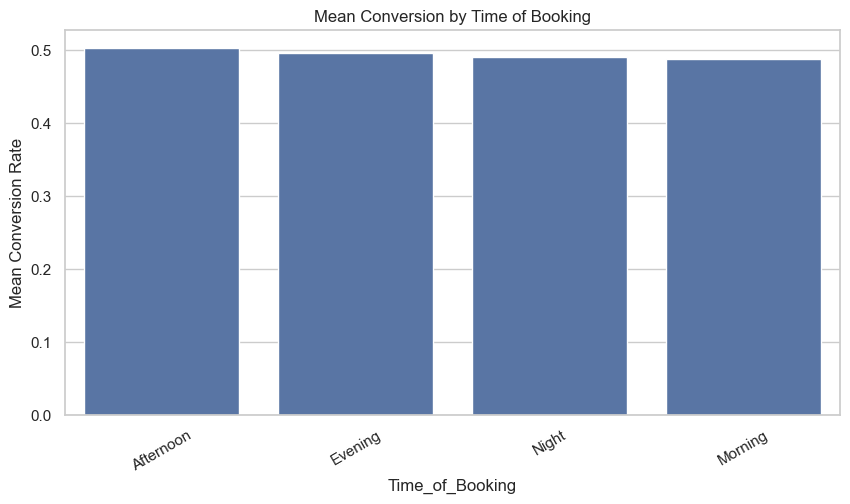

In [19]:
col_time = get_col(df, "Time_of_Booking", "time_of_booking", "time")
col_price = get_col(df, "Price", "price")
col_p_complete = get_col(df, "p_complete", "conversion_prob")
col_riders = get_col(df, "Number_of_Riders", "riders")

# fallback for missing conversion probability
if col_p_complete is None:
    np.random.seed(42)
    df["p_complete"] = np.random.uniform(0.2, 0.8, size=len(df))
    col_p_complete = "p_complete"

# ensure time column is string for grouping
df[col_time] = df[col_time].astype(str)

# compute seasonality
seasonality = (
    df.groupby(col_time)
      .agg(mean_conv=(col_p_complete, "mean"),
           mean_price=(col_price, "mean"),
           total_intents=(col_riders, "sum"))
      .sort_values("mean_conv", ascending=False)
)

print(seasonality)

sns.barplot(x=seasonality.index, y=seasonality["mean_conv"])
plt.title("Mean Conversion by Time of Booking")
plt.ylabel("Mean Conversion Rate")
plt.xticks(rotation=30)
plt.show()


              avg_gap_pct   our_price  comp_price
Vehicle_Type                                     
Economy         -0.051271  415.888079  417.847979
Premium          0.320109  475.495491  475.284435


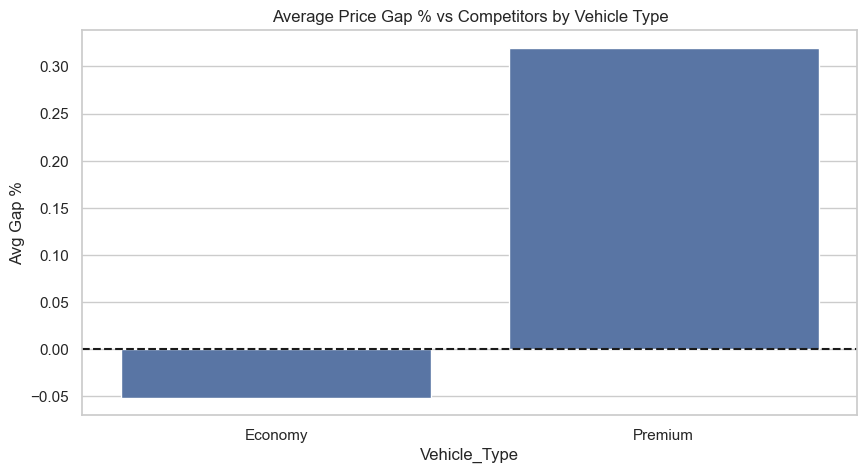

In [20]:
col_comp = get_col(df, "Competitor_Price", "competitor_price")

# fallback for competitor price
if col_comp is None:
    np.random.seed(42)
    df["competitor_price"] = df[col_price] * (1 + np.random.normal(0, 0.05, size=len(df)))
    col_comp = "competitor_price"

# compute price gap %
df["Competitor_Gap_pct"] = (df[col_price] - df[col_comp]) / df[col_comp] * 100

col_vehicle = get_col(df, "Vehicle_Type", "vehicle")

comp_pressure = (
    df.groupby(col_vehicle)
      .agg(avg_gap_pct=("Competitor_Gap_pct", "mean"),
           our_price=(col_price, "mean"),
           comp_price=(col_comp, "mean"))
)

print(comp_pressure)

sns.barplot(x=comp_pressure.index, y=comp_pressure["avg_gap_pct"])
plt.axhline(0, color="k", linestyle="--")
plt.title("Average Price Gap % vs Competitors by Vehicle Type")
plt.ylabel("Avg Gap %")
plt.show()


C:\Users\jyosh\AppData\Local\Temp\ipykernel_9600\2513263169.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inv_summary = df.groupby("Inventory_Band").agg(


                mean_conv  mean_price  count
Inventory_Band                              
Very Tight       0.483525  446.779899    628
Tight            0.517915  452.815873    327
Balanced         0.469819  407.879579     45
Loose                 NaN         NaN      0


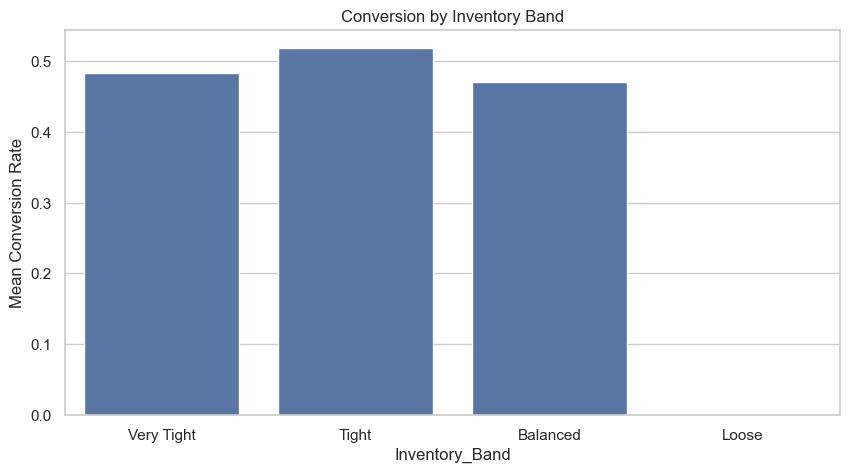

In [21]:
col_ratio = get_col(df, "Driver_to_Rider_Ratio", "driver_to_rider_ratio")

# fallback for ratio
if col_ratio is None:
    df["Driver_to_Rider_Ratio"] = df["Number_of_Drivers"] / df["Number_of_Riders"].replace(0, np.nan)
    col_ratio = "Driver_to_Rider_Ratio"

bins = [0, 0.5, 0.8, 1.2, 10]
labels = ["Very Tight", "Tight", "Balanced", "Loose"]
df["Inventory_Band"] = pd.cut(df[col_ratio].fillna(0), bins=bins, labels=labels)

inv_summary = df.groupby("Inventory_Band").agg(
    mean_conv=(col_p_complete, "mean"),
    mean_price=(col_price, "mean"),
    count=("Inventory_Band", "size")
)

print(inv_summary)

sns.barplot(x=inv_summary.index.astype(str), y=inv_summary["mean_conv"])
plt.title("Conversion by Inventory Band")
plt.ylabel("Mean Conversion Rate")
plt.show()


            mean_conv  mean_price  count
segment_k4                              
3            0.510953  351.761969    245
1            0.498120  529.555897    207
2            0.491328  241.949503    233
0            0.480572  618.505272    315


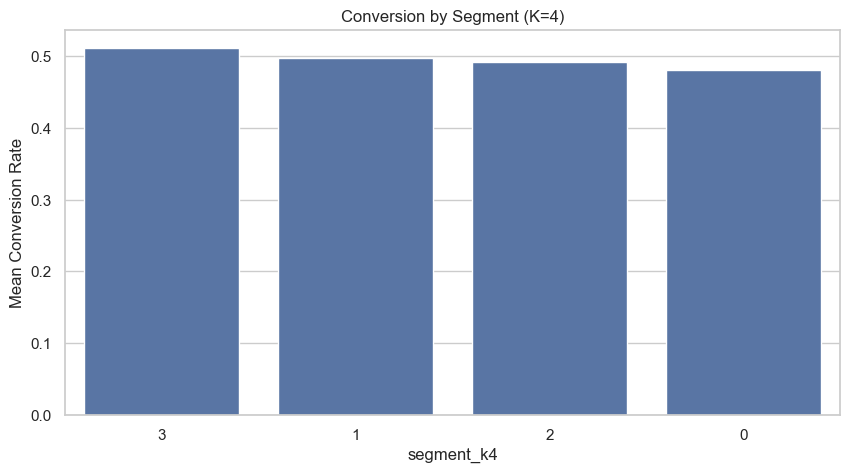

In [23]:
# map loyalty categories to numeric (example)
if df["Customer_Loyalty_Status"].dtype == object:
    df["Loyalty_Score"] = df["Customer_Loyalty_Status"].astype('category').cat.codes
else:
    df["Loyalty_Score"] = df["Customer_Loyalty_Status"]

# make sure Driver_to_Rider_Ratio exists
if "Driver_to_Rider_Ratio" not in df.columns:
    df["Driver_to_Rider_Ratio"] = df["Number_of_Drivers"] / df["Number_of_Riders"].replace(0, np.nan)

seg_features = ["Loyalty_Score", "Driver_to_Rider_Ratio", "Expected_Ride_Duration"]
X = df[seg_features].fillna(df[seg_features].median())

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["segment_k4"] = kmeans.fit_predict(Xs)

seg_profile = df.groupby("segment_k4").agg(
    mean_conv=(col_p_complete, "mean"),
    mean_price=(col_price, "mean"),
    count=("segment_k4", "size")
).sort_values("mean_conv", ascending=False)

print(seg_profile)

sns.barplot(x=seg_profile.index.astype(str), y=seg_profile["mean_conv"])
plt.title("Conversion by Segment (K=4)")
plt.ylabel("Mean Conversion Rate")
plt.show()


In [25]:
import numpy as np
import pandas as pd
from IPython.display import display

# ===========================
# 1. Load your dataset
# ===========================
df = pd.read_csv("dynamic_pricing.csv")
df_fe = df.copy()

# Example feature engineering (you can adjust)
df_fe['baseline_price'] = df_fe['Historical_Cost_of_Ride']
df_fe['Driver_to_Rider_Ratio'] = df_fe['Number_of_Drivers'] / (df_fe['Number_of_Riders'] + 0.01)
df_fe['p_complete'] = df_fe['Driver_to_Rider_Ratio'].clip(upper=1.0)

# ===========================
# 2. Helper functions
# ===========================
def gm_pct(price, cost):
    price, cost = float(price), float(cost)
    if price <= 0: return 0.0
    return (price - cost) / price

# Nudges and policy params
STABILITY_PCT = 0.15
MIN_GM_PCT = 0.12
COMP_CAP = {"Economy": 1.05, "Premium": 1.08}
COMP_FLOOR = {"Economy": 0.90, "Premium": 0.88}
TIME_NUDGE = {"Morning": 0.03, "Afternoon": 0.0, "Evening": 0.04, "Night": 0.01}

def inv_nudge(ratio):
    if ratio < 0.8: return 0.03
    if ratio > 1.2: return -0.03
    return 0.0

# Dummy demand model (replace with your real model)
def estimate_p_complete(row, price):
    base_price = float(row['baseline_price'])
    p_base = float(row['p_complete'])
    price_ratio = price / base_price if base_price > 0 else 1
    prob = p_base * np.exp(-0.5 * (price_ratio - 1))
    return np.clip(prob, 0.01, 0.99)

# ===========================
# 3. Core pricing functions
# ===========================
def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    veh = str(row.get("Vehicle_Type", "Economy"))
    comp = float(row.get("competitor_price", base))

    lo, hi = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)

    base_gm = gm_pct(base, cost)
    min_gm = max(MIN_GM_PCT, base_gm)
    lo_gm = cost / max(1 - min_gm, 1e-9)

    lo_cmp = comp * COMP_FLOOR.get(veh, 0.90)
    hi_cmp = comp * COMP_CAP.get(veh, 1.06)

    lower = max(lo, lo_gm, lo_cmp)
    upper = min(hi, hi_cmp)
    if upper < lower: lower = upper
    return lower, upper

def choose_row_price(row, n_grid=11):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    p_base = float(row["p_complete"])
    lo, hi = row_price_bounds(row)

    t_n = TIME_NUDGE.get(str(row.get("Time_of_Booking", "Afternoon")), 0.0)
    i_n = inv_nudge(float(row.get("Driver_to_Rider_Ratio", 1.0)))
    center = np.clip(base * (1 + t_n + i_n), lo, hi)

    # Build grid around center
    left = np.linspace(lo, center, max(2, n_grid//2), endpoint=False)
    right = np.linspace(center, hi, max(2, n_grid - len(left)), endpoint=True)
    grid = np.unique(np.concatenate([left, right]))

    best_price, best_p, best_rev = base, p_base, base * p_base

    for p in grid:
        if gm_pct(p, cost) < MIN_GM_PCT: continue
        p_now = estimate_p_complete(row, p)
        if p_now < p_base: continue
        rev = p * p_now
        if rev > best_rev:
            best_price, best_p, best_rev = float(p), float(p_now), float(rev)

    return best_price, best_p

# ===========================
# 4. Apply baseline pricing
# ===========================
df_rec = df_fe.copy()
out = [choose_row_price(row) for _, row in df_rec.iterrows()]
df_rec["price"] = np.array([p[0] for p in out]).round(2)
df_rec["p_complete"] = np.clip(np.array([p[1] for p in out]), 0.02, 0.98)

# ===========================
# 5. Sample output
# ===========================
show_cols = ["Vehicle_Type", "Time_of_Booking", "Number_of_Riders", 
             "Number_of_Drivers", "Driver_to_Rider_Ratio", "Historical_Cost_of_Ride",
             "baseline_price", "p_complete"]
sample = df_rec[show_cols].copy()
display(sample.head(10))


,Vehicle_Type,Time_of_Booking,Number_of_Riders,Number_of_Drivers,Driver_to_Rider_Ratio,Historical_Cost_of_Ride,baseline_price,p_complete
0,Premium,Night,90,45,0.499944,284.257273,284.257273,0.499944
1,Economy,Evening,58,39,0.672298,173.874753,173.874753,0.672298
2,Premium,Afternoon,42,31,0.737920,329.795469,329.795469,0.737920
3,Premium,Afternoon,89,28,0.314571,470.201232,470.201232,0.314571
4,Economy,Afternoon,78,22,0.282015,579.681422,579.681422,0.282015
5,Economy,Night,59,35,0.593120,339.955361,339.955361,0.593120
6,Premium,Afternoon,93,43,0.462316,104.061541,104.061541,0.462316
7,Premium,Afternoon,62,39,0.628931,235.811864,235.811864,0.628931
8,Economy,Evening,79,14,0.177193,501.412517,501.412517,0.177193
9,Premium,Night,42,6,0.142823,398.993365,398.993365,0.142823
